## HR Analytics

In [57]:
import pandas as pd

In [58]:
df = pd.read_csv("https://assets.datacamp.com/production/repositories/1765/datasets/ae888d00f9b36dd7d50a4afbc112761e2db766d2/turnover.csv")

In [59]:
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [61]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

### Turning Categorical Variables into numerical

In [62]:
#Ordinal Variables- Can be ranked eg. small, medium, large.
#Nominal Variables- No intrinsic order eg. Sales, Marketing, HR

In [63]:
#Based on what type of categorical variables you have there are different methods for 
#transforming them

#### Encoding Categorical Ordinal variables

In [64]:
df.salary = df.salary.astype("category") #Changes the type to categorical
df.salary = df.salary.cat.reorder_categories(["low",
                                            "medium",
                                            "high"]) #Need to order the categories
df.salary = df.salary.cat.codes #Encodes the categories with integer values

In [65]:
df["salary"].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

#### Encoding Nominal Variables

In [66]:
#In nominal there is no ranking so we accomplish through 
#dummy variables
departments = pd.get_dummies(df.department)

In [67]:
departments

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


### Descriptive insights

In [68]:
n_employees = len(df)

In [69]:
#Total Number of Employees
n_employees

14999

In [70]:
#Total number of employees who churned
df.churn.value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [71]:
#Percentage of employees who left/stayed
print(df.churn.value_counts()/n_employees*100)

0    76.191746
1    23.808254
Name: churn, dtype: float64


In [72]:
#Now we want to learn which variables have a positive or 
#negative relationship with our target (Churn)

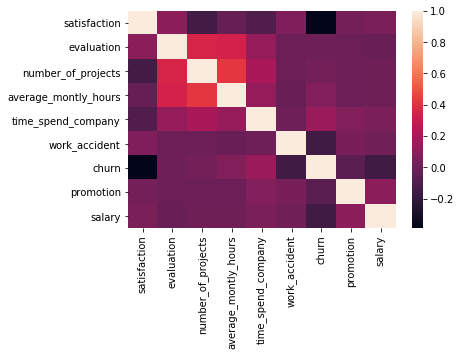

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()


In [74]:
#Data cleaning

In [75]:
df2 = pd.concat([df,departments],axis=1)

In [76]:
df2

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,0,0,0,0,0,0,0,0,0,1,0


In [77]:
df2.drop(["department"],axis=1,inplace=True)

In [78]:
df2

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Part 2: Predicting Employee Turnover

#### Splitting the data

In [79]:
#target = Churn
#features = Everything else.
#We are using features to determine targets

In [80]:
target = df2["churn"]

In [81]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: churn, dtype: int64

In [82]:
features = df2.drop("churn",axis=1)

In [83]:
features

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [84]:
#Overfitting the dataset is a common problem in analytics. 
#This happens when a model is working well on the dataset it was developed upon, 
#but fails to generalize outside of it.

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

#### Introduction to Decision Tree Classification

In [87]:
# We will use the Decision Tree algorithm to run our prediction

In [88]:
#DEcision tree splitting

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
model = DecisionTreeClassifier(random_state=42)

In [91]:
#Fit the training sets
model.fit(features_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [92]:
# Check the accuracy score of the prediction 
#for the training set
model.score(features_train,target_train)*100

100.0

In [93]:
# Check the accuracy score of the prediction for the test set
model.score(features_test,target_test)*100

97.22666666666666

In [94]:
#In Decision Tree classification tasks, 
#overfitting is usually the result of deeply grown trees.


### Evaluating The Turnover Prediction Model

In [95]:
#Tuning the classifier to fight overfitting

In [96]:
# Currently our tree is overfitted

In [97]:
#To solve this problem we have two solutions:
# 1. Pruning the Tree- we limit the tree to maximum depth
# 2. Or we limit the minimum sample size in leafs

In [98]:
#Pruning the tree- set an additional parameter of max_depth
model_depth_5 = DecisionTreeClassifier(max_depth=5,random_state=42)

In [99]:
model_depth_5.fit(features_train,target_train)
model_depth_5.score(features_train,target_train)*100

97.71535247577563

In [100]:
model_depth_5.score(features_test,target_test)*100

97.06666666666666

In [101]:
#Limit the Samples

In [102]:
model_sample_100 = DecisionTreeClassifier(
    min_samples_leaf=100,random_state=42)

In [103]:
#Fit and test:
# Print the accuracy of the prediction for the training set
model_sample_100.fit(features_train,target_train)
model_sample_100.score(features_train,target_train)*100

96.57747355320473

In [104]:
# Print the accuracy of the prediction for the test set
model_sample_100.score(features_test,target_test)*100

96.13333333333334

### The Confusion Matrix

In [105]:
#Confusion Matrix: 2X2: False Positives, False Negatives, 
#True Positives, True Negatives

In [106]:
# RECALL: TP/(TP+FN) = % of correct predictions amoung the churners
#For recall you bet that they were going to churn

#SPECIFICITY: TN/(TN+FP) = % of correct predictions among stayers
#For specificity you bet that they were not going to churn

#PRECISION = TP/(TP+FP)=% of leavers in reality among those who 
#you predicted would leave

In [107]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

In [108]:
# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

In [109]:
# Calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction)

0.9231590181430096

In [110]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score
prediction = model.predict(features_test)
recall_score(target_test, prediction)

0.9643255295429208

In [111]:
#In establishing which measure is better (Recall, Precision or
#Specificity) it is better to balance them all

In [112]:
#AUC Score = Area Under Curve

### Class Imbalance

In [113]:
#To solve the class imbalance problem, what we can do is to change the
#Prior probabilities

In [114]:
print(df.churn.value_counts()/n_employees*100)

0    76.191746
1    23.808254
Name: churn, dtype: float64


In [115]:
# We saw earlier that 0s are 76% of our dataset. This makes our sample
# imbalanced and explains why our model is better at predicting 0s than
# 1s. To solve it we need to rebalance the class weights which would 
# Change the probabilities from 76-24 to 50-50.

In [116]:
# Using the class_weight argument in sklearn's DecisionTreeClassifier, 
# one can make the classes become "balanced".

In [120]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,
            class_weight="balanced",random_state=42)

In [121]:
# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(features_test,target_test)*100)

93.70666666666668


In [125]:

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42)
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)
# Print the recall score for the balanced model
print(recall_score(target_test,prediction_b))

0.9319955406911928


## Part 4: Hyperparameter Tuning

In [137]:
#A hyperparameter is a parameter inside a function. 
#For example, max_depth or min_samples_leaf are hyperparameters of 
#the DecisionTreeClassifier() function

# How do we decide what parameters we use for maximum depth or any
#other parameter?

In [129]:
# To find the optimal values for your parameters, this is known as 
# Hyperparameter tuning. You can create a grid and find the one that 
# acheives the maximum accuracy

In [130]:
#GRIDSEARCH is when you use an sklearn algorithm to combine all possible 
#combinations of values for leaf samples and maximum depth.

In [131]:
#While Train-test split ensures that you are not overfitting your model,
#Hyperparameter tuning may result in overfitting the test component.

In [132]:
# Hyperparameter tuning may result in overfitting the test component, 
# since it consists in tuning the model to get the best prediction 
# results on the test set. Therefore, it is recommended to validate 
# the model on different testing sets. 
# K-fold cross-validation allows us to achieve this

In [134]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

In [136]:
# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.984      0.98933333 0.97066667 0.96866667 0.96266667 0.97866667
 0.99133333 0.994      1.         1.        ]


## Gridsearch

In [139]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [140]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

In [141]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


### Feature Importance

In [143]:
# Feature importance of a model is determined as the relative decrease
# in Gini due to the selected feature. Importances are scaled to sum
# up to 100%. Higher percentage is higher importance

In [144]:
#Among other things, Decision Trees are very popular because of 
#their interpretability. Many models can provide accurate predictions, 
#but Decision Trees can also quantify the effect of the different 
#features on the target. 

In [146]:
# Calculate feature importances
feature_importances = model.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.500877
evaluation,0.150918
time_spend_company,0.138709
number_of_projects,0.100269
average_montly_hours,0.087518
salary,0.006054
technical,0.004107
support,0.003125
sales,0.001409
work_accident,0.001259


In [148]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

In [150]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=8, min_samples_leaf=150, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)


95.28
91.75027870680044
